In [43]:
# https://github.com/plotly/dash-sample-apps/tree/main/apps/dash-opioid-epidemic
# This link contains instructions on how to download the stuff needed. 
# The following URL opens what this app produces:
# https://dash.gallery/dash-opioid-epidemic/
# There is a useful getting started section at the bottom
import os
import pathlib
import re
# I changed some of these from the original code as they were outdated.
import dash
from dash import dcc
from dash import html
import pandas as pd
from dash.dependencies import Input, Output, State
import cufflinks as cf
import matplotlib.pyplot as plt

In [44]:
# Initialize app

app = dash.Dash(
    __name__,
    meta_tags=[
        {"name": "viewport", "content": "width=device-width, initial-scale=1.0"}
    ],
)
app.title = "San Diego Police Calls Exploration"
server = app.server

In [45]:
#Loading data for our app
import pymysql
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import requests
import configparser

config = configparser.ConfigParser()

# specify the path to the configuration file stored in the downloads folder
config.read('/Users/kevinbaum/Downloads/config.ini')

['/Users/kevinbaum/Downloads/config.ini']

In [49]:
database = "SanDiego_PD_Calls"
user = 'root'
password = config['DATABASE']['password']
host = '127.0.0.1'

engine = create_engine(f"mysql://{user}:{password}@{host}:3306/{database}")
connection = engine.connect()

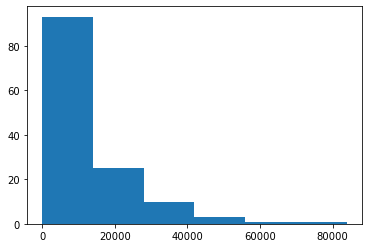

In [35]:
# Loading data for calls by beats
callsbybeats = connection.execute(
    """
    SELECT 
        *
    FROM
        callsbybeats
    """)
column_names = callsbybeats.keys()
rows = callsbybeats.fetchall()
callsbybeats_df = pd.DataFrame(rows, columns=column_names)
callsbybeats_df = callsbybeats_df.sort_values('CALLSPERBEAT', ascending=False)
# callsbybeats_df
plt.hist(callsbybeats_df['CALLSPERBEAT'], bins=6)
plt.show()

In [36]:
# Loading data for calls by type
callsbycalltype = connection.execute(
    """
    SELECT 
        *
    FROM
        callsbycalltype
    """)
column_names = callsbycalltype.keys()
rows = callsbycalltype.fetchall()
callsbycalltype_df = pd.DataFrame(rows, columns=column_names)

In [37]:
# Loading data for calls by beats
callsbydispositioncode = connection.execute(
    """
    SELECT 
        *
    FROM
        callsbydispositioncode
    """)
column_names = callsbydispositioncode.keys()
rows = callsbydispositioncode.fetchall()
callsbydispositioncode_df = pd.DataFrame(rows, columns=column_names)

In [38]:
# Loading data for calls by beats
callsperdaybyreasondispositionbeat = connection.execute(
    """
    SELECT 
        *
    FROM
        callsperdaybyreasondispositionbeat
    """)
column_names = callsperdaybyreasondispositionbeat.keys()
rows = callsperdaybyreasondispositionbeat.fetchall()
callsperdaybyreasondispositionbeat_df = pd.DataFrame(rows, columns=column_names)

In [39]:
# Loading data for calls by beats
callsperzipcode = connection.execute(
    """
    SELECT 
        *
    FROM
        callsperzipcode
    """)
column_names = callsperzipcode.keys()
rows = callsperzipcode.fetchall()
callsperzipcode_df = pd.DataFrame(rows, columns=column_names)

In [50]:
# Loading data for calls by beats
calltypessperzipcode = connection.execute(
    """
    SELECT 
        *
    FROM
        calltypessperzipcode
    """)
column_names = calltypessperzipcode.keys()
rows = calltypessperzipcode.fetchall()
calltypessperzipcode_df = pd.DataFrame(rows, columns=column_names)

In [51]:
calltypessperzipcode_df

,ZIPCODE,CALLTYPESSPERZIPCODE
0,92093,1
1,92101,11
2,92102,3
3,92103,2
4,92104,2
5,92105,8
6,92106,2
7,92107,1
8,92108,1
9,92109,4


In [52]:
#  Load data for example app

# I changed this part from the original code as it was outdated
APP_PATH = str(pathlib.Path().resolve())

df_lat_lon = pd.read_csv(
    os.path.join(APP_PATH, os.path.join("data", "lat_lon_counties.csv"))
)
df_lat_lon["FIPS "] = df_lat_lon["FIPS "].apply(lambda x: str(x).zfill(5))

df_full_data = pd.read_csv(
    os.path.join(
        APP_PATH, os.path.join("data", "age_adjusted_death_rate_no_quotes.csv")
    )
)
df_full_data["County Code"] = df_full_data["County Code"].apply(
    lambda x: str(x).zfill(5)
)
df_full_data["County"] = (
    df_full_data["Unnamed: 0"] + ", " + df_full_data.County.map(str)
)

df_lat_lon.head()

,Unnamed: 0,Sort,State,FIPS,County,CountySeat(s),Population(2010),LandAreakm2,LandAreami2,WaterAreakm2,WaterAreami2,TotalAreakm2,TotalAreami2,Latitude,Longitude,Hover
0,0,1,AL,01001,Autauga,Prattville,"54,571","1,539.582",594.436,25.776,9.952,"1,565.358",604.388,32.536382,-86.644490,Autauga<br>AL<br>01001
1,1,2,AL,01003,Baldwin,Bay Minette,"182,265","4,117.522","1,589.784","1,133.190",437.527,"5,250.712","2,027.311",30.659218,-87.746067,Baldwin<br>AL<br>01003
2,2,3,AL,01005,Barbour,Clayton,"27,457","2,291.819",884.876,50.865,19.639,"2,342.684",904.515,31.870670,-85.405456,Barbour<br>AL<br>01005
3,3,4,AL,01007,Bibb,Centreville,"22,915","1,612.481",622.582,9.289,3.587,"1,621.770",626.169,33.015893,-87.127148,Bibb<br>AL<br>01007
4,4,5,AL,01009,Blount,Oneonta,"57,322","1,669.962",644.776,15.157,5.852,"1,685.119",650.628,33.977448,-86.567246,Blount<br>AL<br>01009


In [7]:
# YEARS = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
YEARS = [2020, 2021, 2022, 2023]
# BINS = [
#     "0-2",
#     "2.1-4",
#     "4.1-6",
#     "6.1-8",
#     "8.1-10",
#     "10.1-12",
#     "12.1-14",
#     "14.1-16",
#     "16.1-18",
#     "18.1-20",
#     "20.1-22",
#     "22.1-24",
#     "24.1-26",
#     "26.1-28",
#     "28.1-30",
#     ">30",
# ]

BINS = [
    "0-10000",
    "10001-20000",
    "20001-30000",
    "30001-40000",
    "40001-50000",
    ">50000",
]

In [8]:
DEFAULT_COLORSCALE = [
    "#f2fffb",
    "#79ffd6",
    "#69e7c0",
    "#25a27b",
    "#188463",
    "#10523e",
]

DEFAULT_OPACITY = 0.8

mapbox_access_token = "pk.eyJ1IjoicGxvdGx5bWFwYm94IiwiYSI6ImNrOWJqb2F4djBnMjEzbG50amg0dnJieG4ifQ.Zme1-Uzoi75IaFbieBDl3A"
mapbox_style = "mapbox://styles/plotlymapbox/cjvprkf3t1kns1cqjxuxmwixz"

In [9]:
# App layout

app.layout = html.Div(
    id="root",
    children=[
        html.Div(
            id="header",
            children=[
                html.A(
                    html.Img(id="logo", src=app.get_asset_url("usd_logo.png")),
                    href="https://plotly.com/dash/",
                ),
#                 html.A(
#                     html.Button("Enterprise Demo", className="link-button"),
#                     href="https://plotly.com/get-demo/",
#                 ),
#                 html.A(
#                     html.Button("Source Code", className="link-button"),
#                     href="https://github.com/plotly/dash-sample-apps/tree/main/apps/dash-opioid-epidemic",
#                 ),
                html.H4(children="Exploration of Police Calls in San Diego County"),
#                 html.P(
#                     id="description",
#                     children="† Deaths are classified using the International Classification of Diseases, \
#                     Tenth Revision (ICD–10). Drug-poisoning deaths are defined as having ICD–10 underlying \
#                     cause-of-death codes X40–X44 (unintentional), X60–X64 (suicide), X85 (homicide), or Y10–Y14 \
#                     (undetermined intent).",
#                 ),
            ],
        ),
        html.Div(
            id="app-container",
            children=[
                html.Div(
                    id="left-column",
                    children=[
                        html.Div(
                            id="slider-container",
                            children=[
                                html.P(
                                    id="slider-text",
                                    children="Drag the slider to change the year:",
                                ),
                                dcc.Slider(
                                    id="years-slider",
                                    min=min(YEARS),
                                    max=max(YEARS),
                                    value=min(YEARS),
                                    marks={
                                        str(year): {
                                            "label": str(year),
                                            "style": {"color": "#7fafdf"},
                                        }
                                        for year in YEARS
                                    },
                                ),
                            ],
                        ),
                        html.Div(
                            id="heatmap-container",
                            children=[
                                html.P(
                                    "Heatmap of age adjusted mortality rates \
                            from poisonings in year {0}".format(
                                        min(YEARS)
                                    ),
                                    id="heatmap-title",
                                ),
                                dcc.Graph(
                                    id="county-choropleth",
                                    figure=dict(
                                        layout=dict(
                                            mapbox=dict(
                                                layers=[],
                                                accesstoken=mapbox_access_token,
                                                style=mapbox_style,
                                                center=dict(
#                                                     Setting up the latitude/longitude
#                                                     default of San Diego
                                                    lat=33.0198, lon=-116.8461
                                                ),
                                                pitch=0,
                                                zoom=3.5,
                                            ),
                                            autosize=True,
                                        ),
                                    ),
                                ),
                            ],
                        ),
                    ],
                ),
                html.Div(
                    id="graph-container",
                    children=[
                        html.P(id="chart-selector", children="Select chart:"),
                        dcc.Dropdown(
                            options=[
                                {
                                    "label": "Histogram of total number of deaths (single year)",
                                    "value": "show_absolute_deaths_single_year",
                                },
                                {
                                    "label": "Histogram of total number of deaths (1999-2016)",
                                    "value": "absolute_deaths_all_time",
                                },
                                {
                                    "label": "Age-adjusted death rate (single year)",
                                    "value": "show_death_rate_single_year",
                                },
                                {
                                    "label": "Trends in age-adjusted death rate (1999-2016)",
                                    "value": "death_rate_all_time",
                                },
                            ],
                            value="show_death_rate_single_year",
                            id="chart-dropdown",
                        ),
                        dcc.Graph(
                            id="selected-data",
                            figure=dict(
                                data=[dict(x=0, y=0)],
                                layout=dict(
                                    paper_bgcolor="#F4F4F8",
                                    plot_bgcolor="#F4F4F8",
                                    autofill=True,
                                    margin=dict(t=75, r=50, b=100, l=50),
                                ),
                            ),
                        ),
                    ],
                ),
            ],
        ),
    ],
)



In [10]:
@app.callback(
    Output("county-choropleth", "figure"),
    [Input("years-slider", "value")],
    [State("county-choropleth", "figure")],
)
def display_map(year, figure):
    cm = dict(zip(BINS, DEFAULT_COLORSCALE))

    data = [
        dict(
            lat=df_lat_lon["Latitude "],
            lon=df_lat_lon["Longitude"],
            text=df_lat_lon["Hover"],
            type="scattermapbox",
            hoverinfo="text",
            marker=dict(size=5, color="white", opacity=0),
        )
    ]

    annotations = [
        dict(
            showarrow=False,
            align="right",
            text="<b>Age-adjusted death rate<br>per county per year</b>",
            font=dict(color="#2cfec1"),
            bgcolor="#1f2630",
            x=0.95,
            y=0.95,
        )
    ]

    for i, bin in enumerate(reversed(BINS)):
        color = cm[bin]
        annotations.append(
            dict(
                arrowcolor=color,
                text=bin,
                x=0.95,
                y=0.85 - (i / 20),
                ax=-60,
                ay=0,
                arrowwidth=5,
                arrowhead=0,
                bgcolor="#1f2630",
                font=dict(color="#2cfec1"),
            )
        )

    if "layout" in figure:
        lat = figure["layout"]["mapbox"]["center"]["lat"]
        lon = figure["layout"]["mapbox"]["center"]["lon"]
        zoom = figure["layout"]["mapbox"]["zoom"]
    else:
#         lat = 38.72490
#         lon = -95.61446
        lat=33.0198
        lon=-116.8461
        zoom = 3.5

    layout = dict(
        mapbox=dict(
            layers=[],
            accesstoken=mapbox_access_token,
            style=mapbox_style,
            center=dict(lat=lat, lon=lon),
            zoom=zoom,
        ),
        hovermode="closest",
        margin=dict(r=0, l=0, t=0, b=0),
        annotations=annotations,
        dragmode="lasso",
    )

    base_url = "https://raw.githubusercontent.com/jackparmer/mapbox-counties/master/"
    for bin in BINS:
        geo_layer = dict(
            sourcetype="geojson",
            source=base_url + str(year) + "/" + bin + ".geojson",
            type="fill",
            color=cm[bin],
            opacity=DEFAULT_OPACITY,
            # CHANGE THIS
            fill=dict(outlinecolor="#afafaf"),
        )
        layout["mapbox"]["layers"].append(geo_layer)

    fig = dict(data=data, layout=layout)
    return fig


@app.callback(Output("heatmap-title", "children"), [Input("years-slider", "value")])
def update_map_title(year):
    return "Heatmap of age adjusted mortality rates \
				from poisonings in year {0}".format(
        year
    )


@app.callback(
    Output("selected-data", "figure"),
    [
        Input("county-choropleth", "selectedData"),
        Input("chart-dropdown", "value"),
        Input("years-slider", "value"),
    ],
)
def display_selected_data(selectedData, chart_dropdown, year):
    if selectedData is None:
        return dict(
            data=[dict(x=0, y=0)],
            layout=dict(
                title="Click-drag on the map to select counties",
                paper_bgcolor="#1f2630",
                plot_bgcolor="#1f2630",
                font=dict(color="#2cfec1"),
                margin=dict(t=75, r=50, b=100, l=75),
            ),
        )
    pts = selectedData["points"]
    fips = [str(pt["text"].split("<br>")[-1]) for pt in pts]
    for i in range(len(fips)):
        if len(fips[i]) == 4:
            fips[i] = "0" + fips[i]
    dff = df_full_data[df_full_data["County Code"].isin(fips)]
    dff = dff.sort_values("Year")

    regex_pat = re.compile(r"Unreliable", flags=re.IGNORECASE)
    dff["Age Adjusted Rate"] = dff["Age Adjusted Rate"].replace(regex_pat, 0)

    if chart_dropdown != "death_rate_all_time":
        title = "Absolute deaths per county, <b>1999-2016</b>"
        AGGREGATE_BY = "Deaths"
        if "show_absolute_deaths_single_year" == chart_dropdown:
            dff = dff[dff.Year == year]
            title = "Absolute deaths per county, <b>{0}</b>".format(year)
        elif "show_death_rate_single_year" == chart_dropdown:
            dff = dff[dff.Year == year]
            title = "Age-adjusted death rate per county, <b>{0}</b>".format(year)
            AGGREGATE_BY = "Age Adjusted Rate"

        dff[AGGREGATE_BY] = pd.to_numeric(dff[AGGREGATE_BY], errors="coerce")
        deaths_or_rate_by_fips = dff.groupby("County")[AGGREGATE_BY].sum()
        deaths_or_rate_by_fips = deaths_or_rate_by_fips.sort_values()
        # Only look at non-zero rows:
        deaths_or_rate_by_fips = deaths_or_rate_by_fips[deaths_or_rate_by_fips > 0]
        fig = deaths_or_rate_by_fips.iplot(
            kind="bar", y=AGGREGATE_BY, title=title, asFigure=True
        )

        fig_layout = fig["layout"]
        fig_data = fig["data"]

        fig_data[0]["text"] = deaths_or_rate_by_fips.values.tolist()
        fig_data[0]["marker"]["color"] = "#2cfec1"
        fig_data[0]["marker"]["opacity"] = 1
        fig_data[0]["marker"]["line"]["width"] = 0
        fig_data[0]["textposition"] = "outside"
        fig_layout["paper_bgcolor"] = "#1f2630"
        fig_layout["plot_bgcolor"] = "#1f2630"
        fig_layout["font"]["color"] = "#2cfec1"
        fig_layout["title"]["font"]["color"] = "#2cfec1"
        fig_layout["xaxis"]["tickfont"]["color"] = "#2cfec1"
        fig_layout["yaxis"]["tickfont"]["color"] = "#2cfec1"
        fig_layout["xaxis"]["gridcolor"] = "#5b5b5b"
        fig_layout["yaxis"]["gridcolor"] = "#5b5b5b"
        fig_layout["margin"]["t"] = 75
        fig_layout["margin"]["r"] = 50
        fig_layout["margin"]["b"] = 100
        fig_layout["margin"]["l"] = 50

        return fig

    fig = dff.iplot(
        kind="area",
        x="Year",
        y="Age Adjusted Rate",
        text="County",
        categories="County",
        colors=[
            "#1b9e77",
            "#d95f02",
            "#7570b3",
            "#e7298a",
            "#66a61e",
            "#e6ab02",
            "#a6761d",
            "#666666",
            "#1b9e77",
        ],
        vline=[year],
        asFigure=True,
    )

    for i, trace in enumerate(fig["data"]):
        trace["mode"] = "lines+markers"
        trace["marker"]["size"] = 4
        trace["marker"]["line"]["width"] = 1
        trace["type"] = "scatter"
        for prop in trace:
            fig["data"][i][prop] = trace[prop]

    # Only show first 500 lines
    fig["data"] = fig["data"][0:500]

    fig_layout = fig["layout"]

    # See plot.ly/python/reference
    fig_layout["yaxis"]["title"] = "Age-adjusted death rate per county per year"
    fig_layout["xaxis"]["title"] = ""
    fig_layout["yaxis"]["fixedrange"] = True
    fig_layout["xaxis"]["fixedrange"] = False
    fig_layout["hovermode"] = "closest"
    fig_layout["title"] = "<b>{0}</b> counties selected".format(len(fips))
    fig_layout["legend"] = dict(orientation="v")
    fig_layout["autosize"] = True
    fig_layout["paper_bgcolor"] = "#1f2630"
    fig_layout["plot_bgcolor"] = "#1f2630"
    fig_layout["font"]["color"] = "#2cfec1"
    fig_layout["xaxis"]["tickfont"]["color"] = "#2cfec1"
    fig_layout["yaxis"]["tickfont"]["color"] = "#2cfec1"
    fig_layout["xaxis"]["gridcolor"] = "#5b5b5b"
    fig_layout["yaxis"]["gridcolor"] = "#5b5b5b"

    if len(fips) > 500:
        fig["layout"][
            "title"
        ] = "Age-adjusted death rate per county per year <br>(only 1st 500 shown)"

    return fig


if __name__ == "__main__":
    app.run_server(port=8084)


Dash is running on http://127.0.0.1:8084/

Dash is running on http://127.0.0.1:8084/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8084
Press CTRL+C to quit
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /assets/demo-button.css?m=1675948654.4547846 HTTP/1.1" 304 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /assets/opioid.css?m=1675948654.4553242 HTTP/1.1" 200 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_8_1m1675386570.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_8_1m1675386571.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_8_1m1675386571.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_8_0m1675386571.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Feb/2023 05:24:02] "GET /_dash-component-suites/dash/html/dash_html_components.v2_0_8m1675386571.min.js HTTP/1.1" 200